# Steps to follow to making any Model

In [20]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scikit-learn as sklearn

SyntaxError: invalid syntax (Temp/ipykernel_10960/2170630953.py, line 7)

In [21]:
train  = pd.read_csv("C:\\Users\\user\\Dropbox\\PC\\Desktop\\dev\\Python DSA\\train_ctrUa4K (3).csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train.shape

(614, 13)

In [23]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
train = train.drop(columns = ['Loan_ID'], axis = 1) # To delete a column from provided data

In [26]:
train.head() # loan_ID is no longer there

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [27]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
[train.Loan_Status[train['Loan_Status'] == 'Y'].count()]

[422]

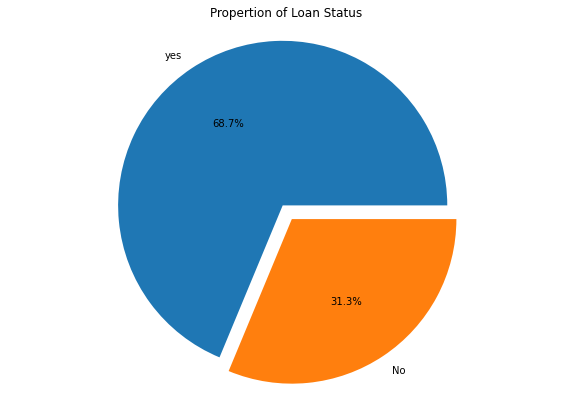

In [29]:
labels = 'yes', 'No'

sizes = [train.Loan_Status[train['Loan_Status'] == 'Y'].count(),train.Loan_Status[train['Loan_Status'] == 'N'].count()]
explode = (0,0.1)

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%')

ax1.axis('equal')
plt.title("Propertion of Loan Status", size = 12)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

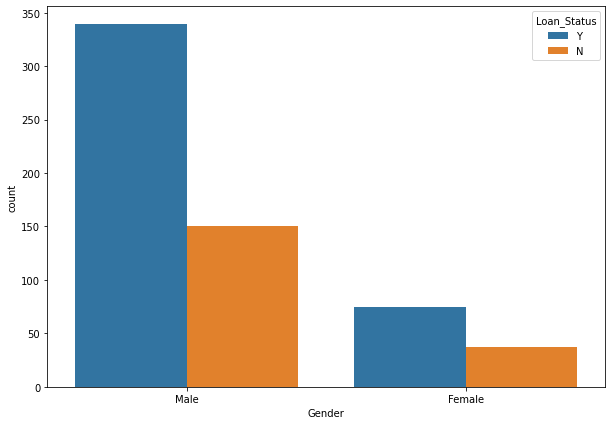

In [30]:
# we are not going to do univariate analysis bcz it woudn't show deep insights
# we are going to do Bivariate analysis, for this pupose we use seaborn graph

# Gender vs Loan Status
plt.figure(figsize = (10,7))
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = train)

<AxesSubplot:xlabel='Married', ylabel='count'>

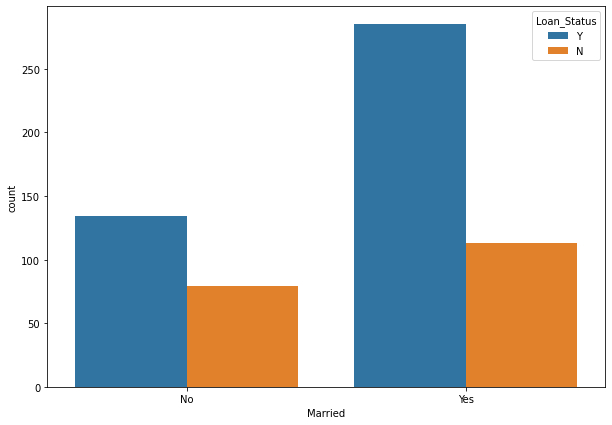

In [31]:
# Married vs Loan Status

plt.figure(figsize = (10,7))
sns.countplot(x = 'Married', hue = 'Loan_Status', data = train)

# we can also check for more columns but here we are not doing so

<AxesSubplot:xlabel='Education', ylabel='count'>

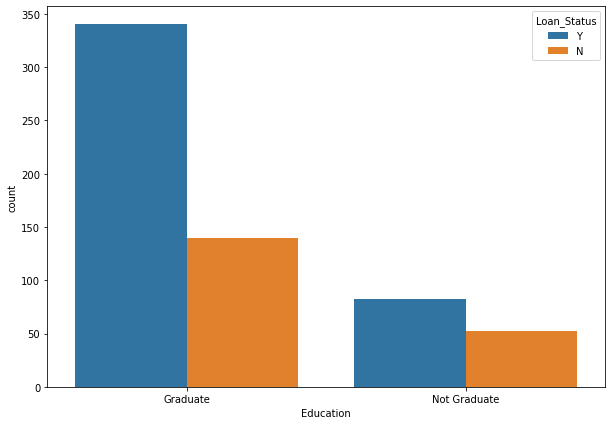

In [32]:
# Education vs Loan Status

plt.figure(figsize = (10,7))
sns.countplot(x = 'Education', hue = 'Loan_Status', data = train)

# we can also check for more columns but here we are not doing so

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

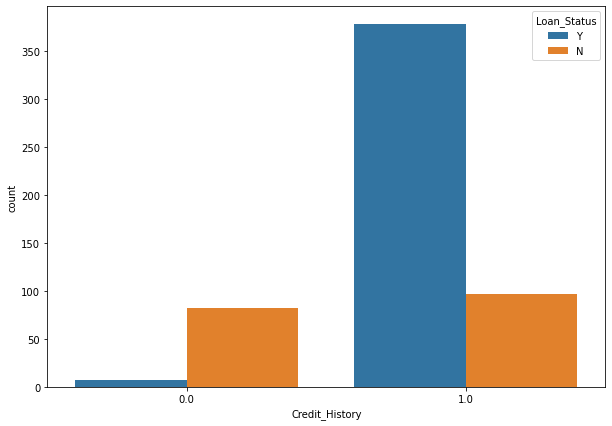

In [33]:
# Credit_History vs Loan Status

plt.figure(figsize = (10,7))
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = train)

# we can also check for more columns but here we are not doing so

In [34]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
num_cols = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# with the help of heat map we can reduce the complexity of data
# like if the color is light means high correlation value is high
# if the color is dark means value is negative or very less
# if the correlation value is very high this means they are strongly related 
# to each other that means we can drop some columns that are affecting as same.
# if there is colinearity between both column that means the correlation value
# is greater than 8 or 9, so we can drop any one of the column
# it (heat map) can help in features

<function matplotlib.pyplot.show(close=None, block=None)>

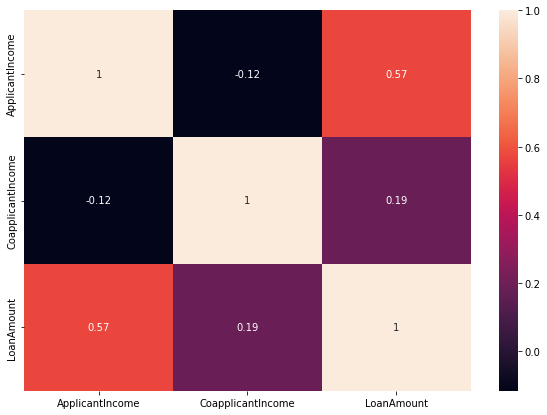

In [38]:
# Heat Map
num_cols = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
plt.figure(figsize = (10,7))
cor = num_cols.corr()
sns.heatmap(cor,annot = True)
plt.show     

# we have analysed till now that these 5 features are very important :- 
# married, Credit_History, LoanAmount, ApplicantIncome, CoapplicantIncome

## Feature Engineering

In [39]:
# here we need to check null values so that we can remove them from the data

# Handling the missing values

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)

train['Married'].fillna(train['Married'].mode()[0], inplace = True)

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace = True)

In [40]:
train.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Handling Categorical Data, here 7 column of categorical data

train.Loan_Status = train.Loan_Status.replace({'Y': 1,'N': 0})
train.Gender = train.Gender.replace({'Male': 1, 'Female': 0})
train.Married = train.Married.replace({'Yes': 1, 'No': 0})
train.Self_Employed = train.Self_Employed.replace({'Yes': 1, 'No': 0})

train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [42]:
from sklearn.preprocessing import LabelEncoder

cat_col = ['Education', 'Property_Area']
le = LabelEncoder()

for i in cat_col:
    train[i] = le.fit_transform(train[i])


In [43]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Data Preparation & Algorithm Selection

In [44]:
x = train.drop(['Dependents', 'Gender', 'Loan_Status'], axis = 1)  # droping the column in which the null values are present more
y = train['Loan_Status']

In [45]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

In [46]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((429, 9), (429,), (185, 9), (185,))

## Model Building

In [47]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [48]:
# Fit the data

log_reg.fit(x_train, y_train)

LogisticRegression()

In [49]:
# Making Prediction

y_pred_t = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

In [57]:
# Evaluation 

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy on training data:", accuracy_score(y_train, y_pred_t))

Accuracy on training data: 0.8321678321678322


In [58]:
print("Accuracy on test data", accuracy_score(y_test, y_pred))

Accuracy on test data 0.7621621621621621


In [59]:
print("F1-score:", f1_score(y_test, y_pred))

F1-score: 0.8320610687022901


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.45      0.59        71
           1       0.74      0.96      0.83       114

    accuracy                           0.76       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.76      0.74       185



## Making a Predictive System

In [54]:
x_test.loc[502]

Married                 1.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      4865.0
CoapplicantIncome    5624.0
LoanAmount            208.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           1.0
Name: 502, dtype: float64

In [61]:
input_data = [1, 0, 0, 4865,5624,208, 360, 1, 1]

input_data_array = np.asarray(input_data)  # propery of array

input_data_reshaped = input_data_array.reshape(1, -1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print("Application is rejected")
else:
    print("Application is approved")

[1]
Application is approved


In [62]:
y_test.loc[502] 

1